In [3]:
# import dependncies
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
from matplotlib import pyplot as plt

## initial data loading and cleaning

In [4]:
# load data
df = pd.read_csv("data/travel_insurance.csv")

In [5]:
# show details of how data set is constructed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1987 non-null   int64 
 1   Employment Type      1987 non-null   object
 2   GraduateOrNot        1987 non-null   object
 3   AnnualIncome         1987 non-null   int64 
 4   FamilyMembers        1987 non-null   int64 
 5   ChronicDiseases      1987 non-null   int64 
 6   FrequentFlyer        1987 non-null   object
 7   EverTravelledAbroad  1987 non-null   object
 8   TravelInsurance      1987 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 139.8+ KB


In [6]:
# preview data
df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [7]:
# Change TravelInsurance column to be Yes/No, to be used for later analyses
df.TravelInsurance.replace(to_replace=[0,1],
                          value=["No","Yes"],
                          inplace=True)

In [8]:
df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,No
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,No
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,Yes
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,No
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,No


In [9]:
# check values in GraduateOrNot, FrequentFlyer, and EverTravlledAbroad
df[["GraduateOrNot","FrequentFlyer","EverTravelledAbroad"]].value_counts()

GraduateOrNot  FrequentFlyer  EverTravelledAbroad
Yes            No             No                     1154
No             No             No                      204
Yes            Yes            No                      197
               No             Yes                     191
               Yes            Yes                     150
No             Yes            No                       52
               No             Yes                      21
               Yes            Yes                      18
dtype: int64

In [10]:
# create version of data where Yes/No is 1 or 0
df_transf = df.replace(to_replace=["Yes", "No"],
          value=[1,0])

In [11]:
#remove scientific notation of data
pd.options.display.float_format = '{:20,.2f}'.format

In [12]:
# verify column types
df_transf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1987 non-null   int64 
 1   Employment Type      1987 non-null   object
 2   GraduateOrNot        1987 non-null   int64 
 3   AnnualIncome         1987 non-null   int64 
 4   FamilyMembers        1987 non-null   int64 
 5   ChronicDiseases      1987 non-null   int64 
 6   FrequentFlyer        1987 non-null   int64 
 7   EverTravelledAbroad  1987 non-null   int64 
 8   TravelInsurance      1987 non-null   int64 
dtypes: int64(8), object(1)
memory usage: 139.8+ KB


In [13]:
# preview transfored data
df_transf.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,1,400000,6,1,0,0,0
1,31,Private Sector/Self Employed,1,1250000,7,0,0,0,0
2,34,Private Sector/Self Employed,1,500000,4,1,0,0,1
3,28,Private Sector/Self Employed,1,700000,3,1,0,0,0
4,28,Private Sector/Self Employed,1,700000,8,1,1,0,0


In [14]:
# verify that ChronicDiseases, FrequentFlyer, and TravelInsurance columns are populated with 0 and 1
df_transf[["ChronicDiseases","FrequentFlyer","TravelInsurance"]].value_counts()

ChronicDiseases  FrequentFlyer  TravelInsurance
0                0              0                  792
                                1                  326
1                0              0                  307
0                1              1                  179
1                0              1                  145
0                1              0                  138
1                1              1                   60
                                0                   40
dtype: int64

In [15]:
# calculate percentage of data represented by travel insurance customers
df_transf.TravelInsurance.mean()*100

35.73225968797182

## separating customers from non-customers

In [16]:
# split data between customers and non-customrs
ins = df_transf[df_transf.TravelInsurance==1]
non_ins = df_transf[df_transf.TravelInsurance==0]

Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
NumExpr defaulting to 8 threads.


In [17]:
# get summary stats of customers
ins.describe()

,Age,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
count,710.00,710.00,710.00,710.00,710.00,710.00,710.00,710.00
mean,29.89,0.86,"1,133,239.44",4.93,0.29,0.34,0.42,1.00
std,3.33,0.35,"374,844.68",1.68,0.45,0.47,0.49,0.00
min,25.00,0.00,"300,000.00",2.00,0.00,0.00,0.00,1.00
25%,27.00,1.00,"800,000.00",4.00,0.00,0.00,0.00,1.00
50%,30.00,1.00,"1,250,000.00",5.00,0.00,0.00,0.00,1.00
75%,33.00,1.00,"1,400,000.00",6.00,1.00,1.00,1.00,1.00
max,35.00,1.00,"1,800,000.00",9.00,1.00,1.00,1.00,1.00


In [18]:
# get summary stats of non-customers
non_ins.describe()

,Age,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
count,"1,277.00","1,277.00","1,277.00","1,277.00","1,277.00","1,277.00","1,277.00","1,277.00"
mean,29.52,0.85,"821,299.92",4.66,0.27,0.14,0.06,0.00
std,2.64,0.36,"328,898.90",1.56,0.45,0.35,0.25,0.00
min,25.00,0.00,"300,000.00",2.00,0.00,0.00,0.00,0.00
25%,28.00,1.00,"550,000.00",4.00,0.00,0.00,0.00,0.00
50%,29.00,1.00,"800,000.00",4.00,0.00,0.00,0.00,0.00
75%,31.00,1.00,"1,100,000.00",6.00,1.00,0.00,0.00,0.00
max,35.00,1.00,"1,750,000.00",9.00,1.00,1.00,1.00,0.00


In [19]:
# see count of employment type for customers as percentages
ins["Employment Type"].value_counts(normalize=True)*100

Private Sector/Self Employed                  80.28
Government Sector                             19.72
Name: Employment Type, dtype: float64

In [20]:
# see count of employment type for non-customers as percentages
non_ins["Employment Type"].value_counts(normalize=True)*100

Private Sector/Self Employed                  66.33
Government Sector                             33.67
Name: Employment Type, dtype: float64

## considering income

In [21]:
inc_by_ins = df.groupby("TravelInsurance").AnnualIncome.mean()
inc_by_ins

TravelInsurance
No              821,299.92
Yes           1,133,239.44
Name: AnnualIncome, dtype: float64

In [22]:
(inc_by_ins[1]/inc_by_ins[0]-1)*100

37.981193798949306

In [23]:
median_inc = df.groupby("TravelInsurance").AnnualIncome.median()
median_inc

TravelInsurance
No      800000
Yes    1250000
Name: AnnualIncome, dtype: int64

In [24]:
(median_inc[1]/median_inc[0]-1)*100

56.25

In [25]:
inc_by_employment = df.groupby("Employment Type").AnnualIncome.mean()
inc_by_employment

Employment Type
Government Sector                        725,350.88
Private Sector/Self Employed           1,016,196.19
Name: AnnualIncome, dtype: float64

In [26]:
(inc_by_employment[1]/inc_by_employment[0]-1)*100

40.09718897211811

In [73]:
med_inc_by_employment = df.groupby("Employment Type").AnnualIncome.median()
med_inc_by_employment

Employment Type
Government Sector                700000
Private Sector/Self Employed    1050000
Name: AnnualIncome, dtype: int64

In [75]:
(med_inc_by_employment[1]/med_inc_by_employment[0]-1)*100

50.0

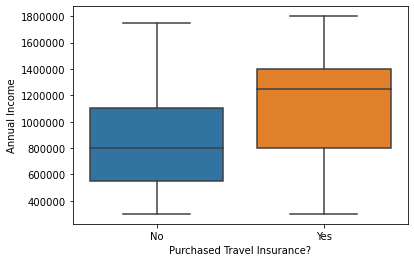

In [27]:
# create box plots of income, showing customers and non-customers separately
g = sns.boxplot(x="TravelInsurance",y="AnnualIncome", data=df_transf)

# remove scientific notation
plt.ticklabel_format(style='plain', axis='y')

plt.ylabel("Annual Income")
plt.xlabel("Purchased Travel Insurance?")
g.set_xticklabels(["No","Yes"])
plt.savefig("resources/purchaser_income_box.png", bbox_inches="tight", facecolor="w")

plt.show()

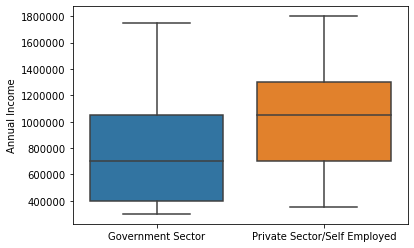

In [28]:
# create box plots of income by employment type
sns.boxplot(x="Employment Type",y="AnnualIncome", data=df)

# remove scientific notation
plt.ticklabel_format(style='plain', axis='y')

plt.xlabel("")
plt.ylabel("Annual Income")
plt.savefig("resources/emp_type_income_box.png", bbox_inches="tight", facecolor="w")
plt.show()

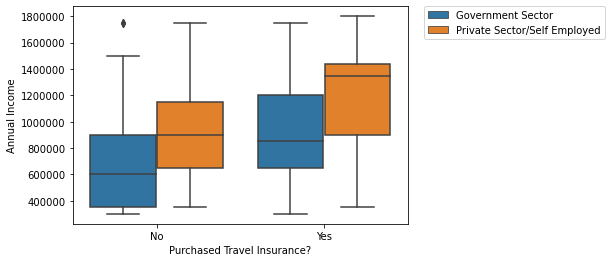

In [29]:
# create box plots of income, showing customers and non-customers separately
g=sns.boxplot(x="TravelInsurance",y="AnnualIncome", data=df, hue="Employment Type")

# remove scientific notation
plt.ticklabel_format(style='plain', axis='y')

plt.ylabel("Annual Income")
plt.xlabel("Purchased Travel Insurance?")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.savefig("resources/ins_emp_type_income_box.png", bbox_inches="tight", facecolor="w")

plt.show()

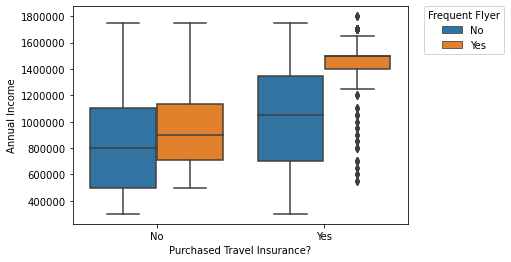

In [30]:
# create box plots of income, showing customers and non-customers separately
g=sns.boxplot(x="TravelInsurance",y="AnnualIncome", data=df, hue="FrequentFlyer")

# remove scientific notation
plt.ticklabel_format(style='plain', axis='y')

plt.ylabel("Annual Income")
plt.xlabel("Purchased Travel Insurance?")
plt.legend(bbox_to_anchor=(1.05, 1),
           loc='upper left',
           borderaxespad=0,
          title="Frequent Flyer")
plt.show()

## family sizes

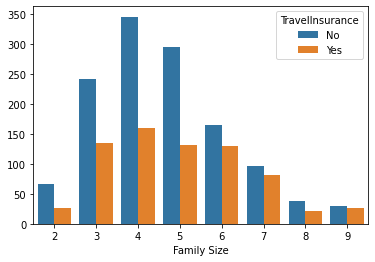

In [31]:
#count plot of family size, show customers and non-customers separately
sns.countplot(x="FamilyMembers", data=df, hue="TravelInsurance")
plt.xlabel("Family Size")
plt.ylabel("")
plt.show()

<AxesSubplot:xlabel='TravelInsurance', ylabel='FamilyMembers'>

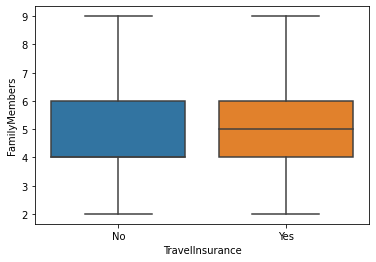

In [32]:
sns.boxplot(x="TravelInsurance", y="FamilyMembers", data=df)

In [33]:
# calculate percentages of customers and non-customers in each family size bin
ins_fam_perc = ins.FamilyMembers.value_counts(normalize=True, sort=False)*100
non_ins_fam_perc = non_ins.FamilyMembers.value_counts(normalize=True, sort=False)*100
print(ins_fam_perc, non_ins_fam_perc)

2                   3.80
3                  19.01
4                  22.54
5                  18.45
6                  18.17
7                  11.41
8                   2.96
9                   3.66
Name: FamilyMembers, dtype: float64 2                   5.17
3                  18.95
4                  27.02
5                  23.10
6                  12.92
7                   7.60
8                   2.98
9                   2.27
Name: FamilyMembers, dtype: float64


In [34]:
# calculate propertion of insured and uninsured customers within each family size grouping
df.groupby("TravelInsurance").FamilyMembers.value_counts(normalize=True, sort=False)*100

TravelInsurance  FamilyMembers
No               2                               5.17
                 3                              18.95
                 4                              27.02
                 5                              23.10
                 6                              12.92
                 7                               7.60
                 8                               2.98
                 9                               2.27
Yes              2                               3.80
                 3                              19.01
                 4                              22.54
                 5                              18.45
                 6                              18.17
                 7                              11.41
                 8                               2.96
                 9                               3.66
Name: FamilyMembers, dtype: float64

In [35]:
ins_fam = ins.FamilyMembers
non_fam = non_ins.FamilyMembers
stats.ttest_ind(ins_fam, non_fam, alternative="greater")

Ttest_indResult(statistic=3.5716348346537448, pvalue=0.00018160400369331164)

## frequent flyers

In [36]:
# calculate percentage of customers who are frequent flyers
df_transf.FrequentFlyer.mean()*100

20.986411675893308

In [37]:
# calculate percentage of frequent flyers by employment type
df_transf.groupby("Employment Type").FrequentFlyer.mean()

Employment Type
Government Sector                              0.12
Private Sector/Self Employed                   0.25
Name: FrequentFlyer, dtype: float64

In [38]:
df["Employment Type"].value_counts()

Private Sector/Self Employed    1417
Government Sector                570
Name: Employment Type, dtype: int64

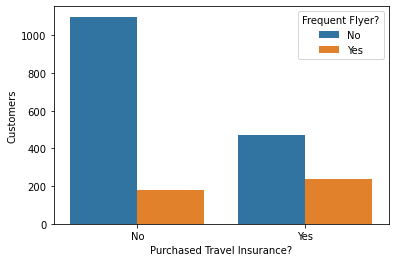

In [39]:
# create count plot to distinguish travel insurance buyers and non-buyers, separating out frequent flyers

sns.countplot(x="TravelInsurance", hue="FrequentFlyer", data=df)
plt.ylabel("Customers")
plt.xlabel("Purchased Travel Insurance?")
plt.legend(title="Frequent Flyer?")
plt.savefig("resources/ins_emp_freq_flyers.png", bbox_inches="tight", facecolor="w")

plt.show()

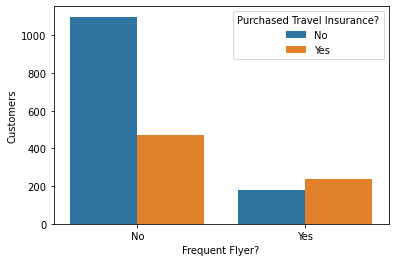

In [70]:
# create count plot to distinguish frequent flyers, separating out travel insurance buyers and non-buyers 

sns.countplot(hue="TravelInsurance", x="FrequentFlyer", data=df)
plt.ylabel("Customers")
plt.legend(title="Purchased Travel Insurance?")
plt.xlabel("Frequent Flyer?")
plt.savefig("resources/freq_flyers_ins.png", bbox_inches="tight", facecolor="w")

plt.show()

In [41]:
# calculate percentage of frequent flyers & non-frequent flyers who purchased travel insurance
df_transf.groupby("FrequentFlyer")["TravelInsurance"].mean()*100

FrequentFlyer
0                  30.00
1                  57.31
Name: TravelInsurance, dtype: float64

In [42]:
# calculate average income of frequent and non-frequent flyers
flyers_inc = df_transf.groupby("FrequentFlyer")["AnnualIncome"].mean()
flyers_inc

FrequentFlyer
0             864,203.82
1           1,190,887.29
Name: AnnualIncome, dtype: float64

In [43]:
# on average what percentage more do frequent flyers earn?
(flyers_inc[1]/flyers_inc[0] - 1)*100

37.80166904212481

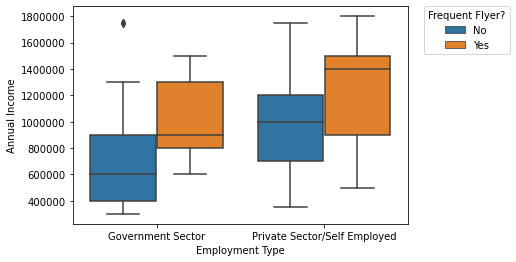

In [44]:
# create box plots of income, separating out employment type and frequent flyers
sns.boxplot(x="Employment Type",y="AnnualIncome", data=df, hue="FrequentFlyer")

# remove scientific notation
plt.ticklabel_format(style='plain', axis='y')

plt.legend(bbox_to_anchor=(1.05, 1),
           loc='upper left',
           borderaxespad=0,
          title = "Frequent Flyer?")
plt.ylabel("Annual Income")
plt.show()

## Travel Abroad

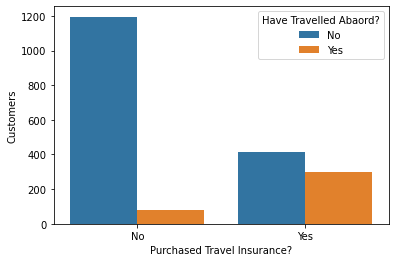

In [45]:
sns.countplot(x="TravelInsurance", hue="EverTravelledAbroad", data=df)
plt.ylabel("Customers")
plt.xlabel("Purchased Travel Insurance?")
plt.legend(title="Have Travelled Abaord?")
plt.savefig("resources/ins_travel_abroad.png", bbox_inches="tight", facecolor="w")

plt.show()

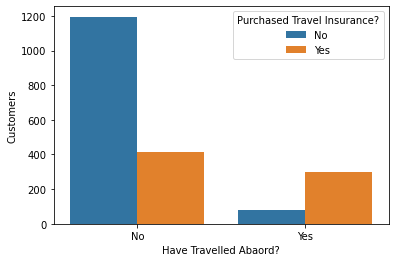

In [72]:
sns.countplot(hue="TravelInsurance", x="EverTravelledAbroad", data=df)
plt.ylabel("Customers")
plt.legend(title="Purchased Travel Insurance?")
plt.xlabel("Have Travelled Abaord?")
plt.savefig("resources/travel_abroad_ins.png", bbox_inches="tight", facecolor="w")

plt.show()

In [46]:
# calculate percentage of those who have and haven't travelled abroad who have purchased travel insurance
df_transf.groupby("EverTravelledAbroad")["TravelInsurance"].mean()*100

EverTravelledAbroad
0                  25.64
1                  78.42
Name: TravelInsurance, dtype: float64

In [47]:
df_transf.EverTravelledAbroad.mean()*100

19.124308002013084

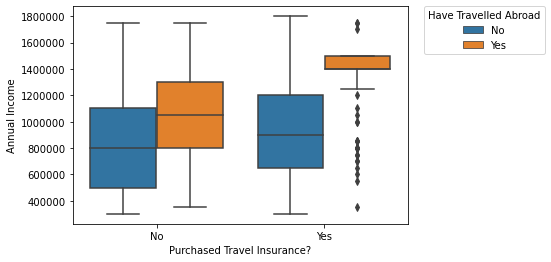

In [48]:
# create box plots of income, showing customers and non-customers separately
g=sns.boxplot(x="TravelInsurance",y="AnnualIncome", data=df, hue="EverTravelledAbroad")

# remove scientific notation
plt.ticklabel_format(style='plain', axis='y')
plt.legend(bbox_to_anchor=(1.05, 1),
           loc='upper left',
           borderaxespad=0,
          title="Have Travelled Abroad")
plt.ylabel("Annual Income")
plt.xlabel("Purchased Travel Insurance?")
g.set_xticklabels(["No","Yes"])
plt.show()

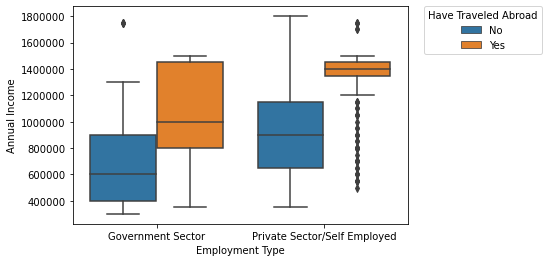

In [49]:
# create box plots of income, showing customers and non-customers separately
g= sns.boxplot(x="Employment Type",
            y="AnnualIncome",
            data=df,
            hue="EverTravelledAbroad")

# remove scientific notation
plt.ticklabel_format(style='plain', axis='y')
plt.legend(bbox_to_anchor=(1.05, 1),
         loc='upper left',
         borderaxespad=0,
        title="Have Traveled Abroad")
plt.ylabel("Annual Income")
plt.show()

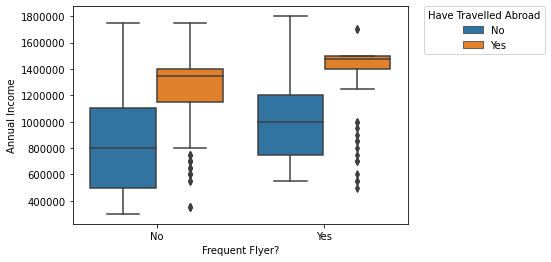

In [50]:
# create box plots of income, showing customers and non-customers separately
sns.boxplot(x="FrequentFlyer",y="AnnualIncome", data=df, hue="EverTravelledAbroad")

# remove scientific notation
plt.ticklabel_format(style='plain', axis='y')
plt.legend(bbox_to_anchor=(1.05, 1),
           loc='upper left',
           borderaxespad=0,
          title="Have Travelled Abroad")
plt.xlabel("Frequent Flyer?")
plt.ylabel("Annual Income")
plt.show()

In [51]:
df.groupby("FrequentFlyer")["Employment Type"].value_counts(normalize=True)*100

FrequentFlyer  Employment Type             
No             Private Sector/Self Employed                  67.96
               Government Sector                             32.04
Yes            Private Sector/Self Employed                  83.93
               Government Sector                             16.07
Name: Employment Type, dtype: float64

## hypothesis testing

In [52]:
# perform hypothesis test
## with h-null that customers who bought insurance and didn't buy insurance have the same income
## and h-alt that customers who bought insurance have higher incomes than those who didn't

# customer income
ins_inc = ins.AnnualIncome

# non-customer income
non_inc = non_ins.AnnualIncome

stats.ttest_ind(ins_inc, non_inc, alternative="greater")

Ttest_indResult(statistic=19.257785253687544, pvalue=3.317508880176645e-76)

In [53]:
# perform hypothesis test
## with h-null that private sector and government employees have the same income
## and h-alt that private sector employees have a higher income than non-customers

# private sector income
priv_inc = df[df["Employment Type"]=="Private Sector/Self Employed"].AnnualIncome

# public sector income
pub_inc = df[df["Employment Type"]=="Government Sector"].AnnualIncome

stats.ttest_ind(priv_inc, pub_inc, alternative="greater")

Ttest_indResult(statistic=16.60090219850942, pvalue=2.3419170641682904e-58)

## additional considerations?

In [54]:
# calculate percentages of customers with both chronic and non-chronic conditions that purpchased travel insurance
df_transf.groupby("ChronicDiseases").TravelInsurance.mean()*100

ChronicDiseases
0                  35.19
1                  37.14
Name: TravelInsurance, dtype: float64

In [55]:
chron = df_transf[df_transf.ChronicDiseases==1].TravelInsurance
non_chron = df_transf[df_transf.ChronicDiseases==0].TravelInsurance
stats.ttest_ind(chron, non_chron, alternative="greater")

Ttest_indResult(statistic=0.8105420115485078, pvalue=0.2088629466892527)

In [56]:
df_transf.groupby("Employment Type").FrequentFlyer.mean()*100

Employment Type
Government Sector                             11.75
Private Sector/Self Employed                  24.70
Name: FrequentFlyer, dtype: float64

In [57]:
df_transf.groupby("Employment Type").EverTravelledAbroad.mean()*100

Employment Type
Government Sector                              7.89
Private Sector/Self Employed                  23.64
Name: EverTravelledAbroad, dtype: float64

In [58]:
df.groupby("GraduateOrNot")["Employment Type"].value_counts(normalize=True)*100

GraduateOrNot  Employment Type             
No             Private Sector/Self Employed                  85.08
               Government Sector                             14.92
Yes            Private Sector/Self Employed                  68.91
               Government Sector                             31.09
Name: Employment Type, dtype: float64